
Logistic Regression Accuracy: 97.36842105263158

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        72
           1       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Logistic Regression Confusion Matrix:


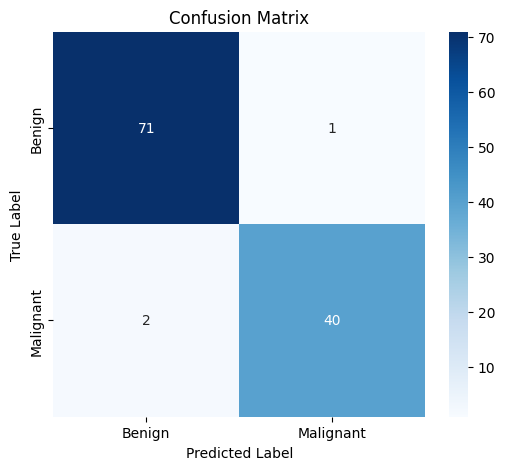

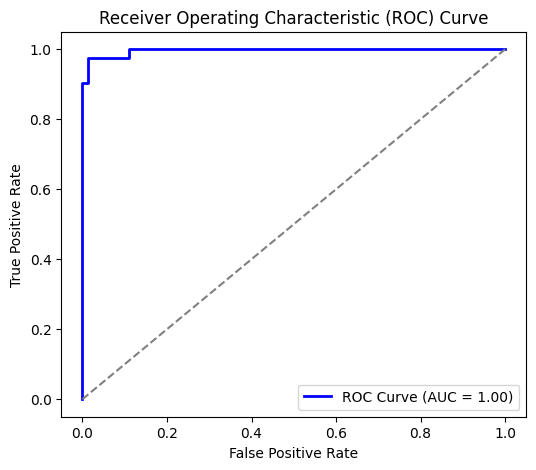

<ipython-input-2-12db6ba372d0>:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df[:10], palette="viridis")


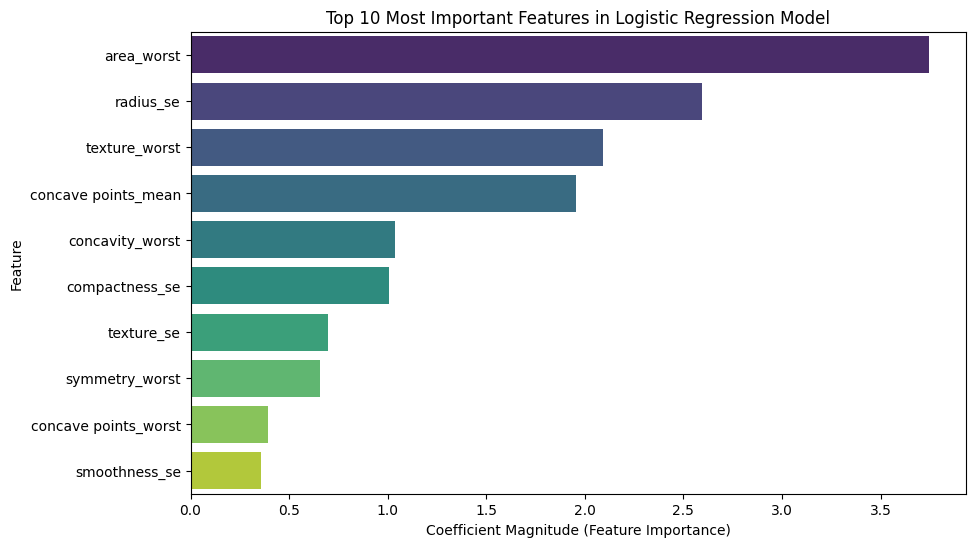


Top 10 Most Important Features:
                 Feature  Importance
23            area_worst    3.743576
10             radius_se    2.594503
21         texture_worst    2.094206
7    concave points_mean    1.953511
26       concavity_worst    1.037132
15        compactness_se    1.007198
11            texture_se    0.696426
28        symmetry_worst    0.659126
27  concave points_worst    0.390506
14         smoothness_se    0.356656


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# Load the dataset
df = pd.read_csv('/content/data.csv')  # For Google Colab

# Drop unnecessary columns
df_cleaned = df.drop(columns=['id', 'Unnamed: 32'])

# Encode the 'diagnosis' column
df_cleaned['diagnosis'] = LabelEncoder().fit_transform(df_cleaned['diagnosis'])

# Splitting the dataset into features (X) and target variable (y)
X = df_cleaned.drop('diagnosis', axis=1)
y = df_cleaned['diagnosis']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Creating and training the Logistic Regression model
lr_model = LogisticRegression(max_iter=2000, random_state=42, solver='liblinear', penalty='l1')  # L1 regularization
lr_model.fit(X_train, y_train)

# Predicting the target variable on the testing set
y_pred_lr = lr_model.predict(X_test)

# Model evaluation
lr_accuracy = 100 * accuracy_score(y_test, y_pred_lr)
print("\nLogistic Regression Accuracy:", lr_accuracy)

# Classification report for Logistic Regression
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

# Generate confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
print("\nLogistic Regression Confusion Matrix:")
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Compute ROC curve and AUC
y_prob = lr_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

# Feature Importance
feature_importance = np.abs(lr_model.coef_[0])
feature_names = X.columns
importance_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df[:10], palette="viridis")
plt.xlabel("Coefficient Magnitude (Feature Importance)")
plt.ylabel("Feature")
plt.title("Top 10 Most Important Features in Logistic Regression Model")
plt.show()

# Display the top 10 features
print("\nTop 10 Most Important Features:")
print(importance_df.head(10))
